# Deep Learning for Dermatophyte Fungi Identification: Insights from the DeFungi Dataset

## Importing Libraries

In [14]:
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from skimage import io, transform
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
import os
import joblib
import cv2

In [15]:
path = r"dataset"
model_folder = "model1"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories


['H3', 'H5', 'H6']

In [16]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)

X and Y arrays loaded successfully.


In [17]:
df = pd.DataFrame(X)
df['Target'] = Y
df

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Target
0,0.548284,0.566299,0.512990,0.581598,0.592157,0.547549,0.629239,0.548702,0.582058,0.664089,...,0.573212,0.572426,0.494485,0.537152,0.540564,0.522652,0.490196,0.465931,0.482353,0
1,0.606250,0.658824,0.634647,0.613584,0.676329,0.663829,0.552574,0.622354,0.642892,0.458333,...,0.535417,0.417157,0.476593,0.570956,0.489216,0.533946,0.589618,0.552941,0.570956,0
2,0.511397,0.560784,0.558245,0.507985,0.540667,0.502696,0.507426,0.531667,0.491789,0.499632,...,0.597549,0.652769,0.613235,0.598529,0.615809,0.636887,0.565564,0.591632,0.614005,0
3,0.531093,0.532387,0.514461,0.479902,0.591299,0.489216,0.470588,0.586592,0.468995,0.482353,...,0.498039,0.525613,0.502011,0.503205,0.517647,0.498775,0.525490,0.535662,0.518593,0
4,0.608054,0.586642,0.592157,0.589828,0.572549,0.562377,0.574020,0.552819,0.541054,0.551225,...,0.641789,0.559191,0.606373,0.645852,0.602206,0.629657,0.682353,0.677784,0.695500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,0.603922,0.615686,0.670588,0.599142,0.611416,0.665809,0.568627,0.594413,0.647009,0.582357,...,0.445588,0.465196,0.478504,0.431373,0.441893,0.453657,0.437623,0.443137,0.463480,2
2372,0.523897,0.558456,0.611765,0.516176,0.563235,0.612623,0.534999,0.574142,0.615614,0.564093,...,0.594485,0.586692,0.637623,0.596078,0.584314,0.617789,0.596078,0.590564,0.613358,2
2373,0.549667,0.560784,0.614740,0.560784,0.556353,0.609436,0.562255,0.538725,0.609436,0.546078,...,0.392770,0.454044,0.481495,0.378064,0.416544,0.466667,0.307475,0.346044,0.402328,2
2374,0.573284,0.582721,0.610172,0.535152,0.540667,0.581637,0.537255,0.553136,0.592207,0.532353,...,0.527083,0.521618,0.570221,0.518505,0.523897,0.572549,0.478431,0.513725,0.549020,2


## CountPlot

<Axes: ylabel='count'>

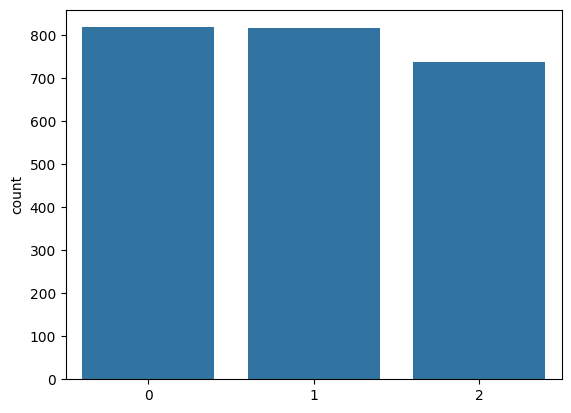

In [18]:
sns.countplot(x = Y)

In [19]:
# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Data Splitting

In [20]:
# Assuming X and y are your feature matrix and target vector
#X_resampled, y_resampled = resample(X_scaled, Y, replace=True, n_samples=1000, random_state=42)
from imblearn.over_sampling import SMOTE
X, Y = SMOTE(random_state=42).fit_resample(X,Y)

<Axes: ylabel='count'>

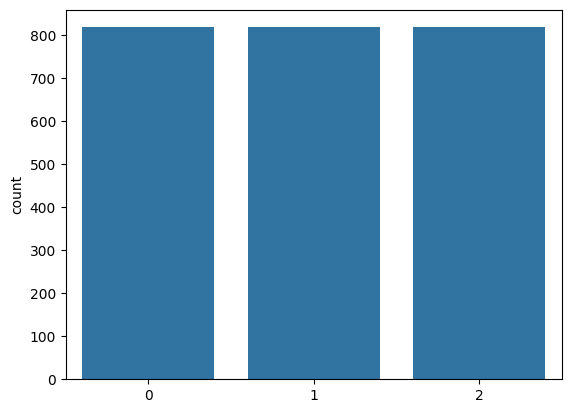

In [21]:
sns.countplot(x = Y)

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [23]:
X_train

array([[0.42034314, 0.57720588, 0.63210784, ..., 0.44080882, 0.53419118,
        0.53651961],
       [0.51320083, 0.5310049 , 0.57668122, ..., 0.55526961, 0.57720588,
        0.65171569],
       [0.62025506, 0.5875    , 0.52867647, ..., 0.76862745, 0.78431373,
        0.77647059],
       ...,
       [0.48532858, 0.59448529, 0.64844133, ..., 0.34648055, 0.34583333,
        0.34889706],
       [0.46572074, 0.59056373, 0.60625   , ..., 0.43826976, 0.54807368,
        0.56862745],
       [0.54966682, 0.64408318, 0.70355392, ..., 0.56608839, 0.65330882,
        0.71307828]])

In [24]:
X_test

array([[0.56862745, 0.4807598 , 0.53958333, ..., 0.66890702, 0.80551471,
        0.73651961],
       [0.49273514, 0.49665671, 0.48881357, ..., 0.52484298, 0.52941176,
        0.5254902 ],
       [0.52156863, 0.57582338, 0.61409314, ..., 0.47843137, 0.53195083,
        0.56565181],
       ...,
       [0.48235294, 0.43137255, 0.40392157, ..., 0.51764706, 0.53566176,
        0.43624004],
       [0.53406863, 0.57095588, 0.59767157, ..., 0.52454427, 0.58039216,
        0.6807598 ],
       [0.57319623, 0.49709329, 0.55750996, ..., 0.5254902 , 0.34509804,
        0.38039216]])

In [25]:
Y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [26]:
Y_test

array([0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2,
       2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0,

In [27]:
X_train.shape

(1719, 12288)

In [28]:
Y_train.shape

(1719,)

In [29]:
labels=categories

## Performance Evaluation

In [30]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [31]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

## AdaBoost Classifier

AdaBoost Classifier model trained and model weights saved.
AdaBoost Accuracy    : 71.81571815718158
AdaBoost Precision   : 72.84860813582456
AdaBoost Recall      : 71.89048017225751
AdaBoost FSCORE      : 71.97828377243695

 AdaBoost classification report
               precision    recall  f1-score   support

          H3       0.69      0.80      0.74       221
          H5       0.76      0.62      0.68       293
          H6       0.72      0.76      0.74       224

    accuracy                           0.72       738
   macro avg       0.72      0.73      0.72       738
weighted avg       0.72      0.72      0.72       738



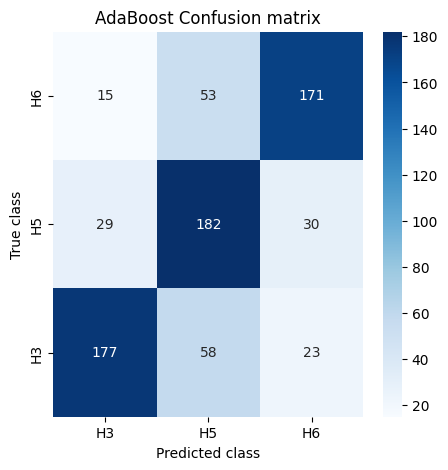

In [33]:
import os
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_file = os.path.join("model1/AdaBoost_Model23.pkl")

if os.path.exists(model_file):
    # Load the model from the pkl file
    ada_classifier = joblib.load(model_file)
else:
    # Create AdaBoost Classifier
    base_estimator = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
    ada_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50)  # ✅ Fix here
    ada_classifier.fit(X_train, Y_train)

    # Save the model
    joblib.dump(ada_classifier, model_file)
    print("AdaBoost Classifier model trained and model weights saved.")

# Make predictions on the test data
Y_predict = ada_classifier.predict(X_test)

# Calculate and print the performance metrics
calculateMetrics("AdaBoost", Y_predict, Y_test)


c:\Users\shash\AppData\Local\Programs\Python\Python312\Lib\pickle.py:1759: UserWarning: [09:47:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\data\../common/error_msg.h:82: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  setstate(state)


XGBoost Accuracy    : 91.73441734417345
XGBoost Precision   : 91.78426872002525
XGBoost Recall      : 91.8269356079565
XGBoost FSCORE      : 91.7365618086274

 XGBoost classification report
               precision    recall  f1-score   support

          H3       0.88      0.95      0.91       239
          H5       0.94      0.90      0.92       253
          H6       0.93      0.91      0.92       246

    accuracy                           0.92       738
   macro avg       0.92      0.92      0.92       738
weighted avg       0.92      0.92      0.92       738



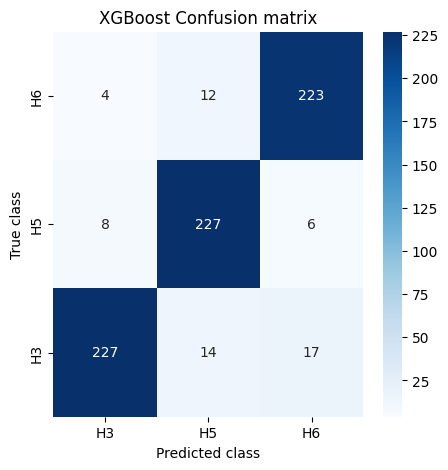

In [34]:
from xgboost import XGBClassifier
import joblib
import os

# Define the model file path
model_file = os.path.join("model1/XGBoost_Model.pkl")

if os.path.exists(model_file):
    # Load the model from the pkl file
    xgb_classifier = joblib.load(model_file)
else:
    # Create XGBoost Classifier
    xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)  # You can tune these hyperparameters
    xgb_classifier.fit(X_train, Y_train)
    # Save the model weights to a pkl file
    joblib.dump(xgb_classifier, model_file)
    print("XGBoost Classifier model trained and model weights saved.")

# Make predictions on the test data
Y_predict = xgb_classifier.predict(X_test)

# Calculate and print the performance metrics
calculateMetrics("XGBoost", Y_predict, Y_test)


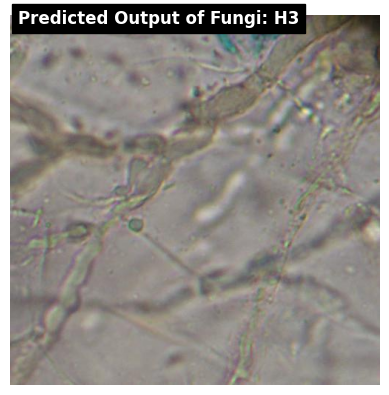

In [37]:
path=r"C:\Users\shash\OneDrive\Desktop\20 Fungi\20 Fungi\test images\H6_7b_4.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=ada_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of Fungi: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()